In [1]:
from __future__ import division

import os
import numpy as np
import time, timeit
import signal
import scipy.io as scio
from scipy.sparse import coo_matrix
from MDPD import *
from MDPD.readers import *
import matplotlib.pyplot as plt
import matplotlib

----
## Read Data

In [2]:
folder = '/media/vzhao/Data/crowdsourcing_datasets/bird'
train = Crowd_Sourcing_Readers.read_data(os.path.join(folder, 'bluebird_crowd.txt'))
label = Crowd_Sourcing_Readers.read_label(os.path.join(folder, 'bluebird_truth.txt'))

In [ ]:
folder = '/media/vzhao/Data/crowdsourcing_datasets/dog'
train = Crowd_Sourcing_Readers.read_data(os.path.join(folder, 'dog_crowd.txt'))
label = Crowd_Sourcing_Readers.read_label(os.path.join(folder, 'dog_truth.txt'))

In [ ]:
folder = '/media/vzhao/Data/crowdsourcing_datasets/rte'
train = Crowd_Sourcing_Readers.read_data(os.path.join(folder, 'rte_crowd.txt'))
label = Crowd_Sourcing_Readers.read_label(os.path.join(folder, 'rte_truth.txt'))

In [ ]:
folder = '/media/vzhao/Data/crowdsourcing_datasets/trec'
train = Crowd_Sourcing_Readers.read_data(os.path.join(folder, 'trec_crowd.txt'))
label = Crowd_Sourcing_Readers.read_label(os.path.join(folder, 'trec_truth.txt'))

In [ ]:
folder = '/media/vzhao/Data/crowdsourcing_datasets/dog'
train = Crowd_Sourcing_Readers.read_data(os.path.join(folder, 'dog_crowd.txt'))
label = Crowd_Sourcing_Readers.read_label(os.path.join(folder, 'dog_truth.txt'))

---
## Analysis

In [3]:
# Original mutual information residue (G score)
score = MDPD.utils.Feature_Selection.MI_score(train, rm_diag=True)
dim = train.shape[1]
print np.sum(score) / (dim * (dim-1))

0.03756253829869128


MDPD/utils.py:173: RuntimeWarning: divide by zero encountered in log
  pmi = second * (np.log(second) - logfirst)
MDPD/utils.py:173: RuntimeWarning: invalid value encountered in multiply
  pmi = second * (np.log(second) - logfirst)


In [4]:
# basic model with majority vote initialization
model = MDPD.MDPD()
model.fit(train, ncomp=2, init='majority', verbose=False, niter=50)
model.accuracy(train, label)

2018-03-29 11:30:11,102 : INFO : Training an MDPD with dimension 39, sample size 108, vocab size 2 and the target number of components 2
2018-03-29 11:30:11,160 : INFO : ACCURACY: 89.81%


0.8981481481481481

In [5]:
model.MI_residue(train)

MDPD/utils.py:200: RuntimeWarning: divide by zero encountered in log
  pmi = second * (np.log(second) - logfirst)
MDPD/utils.py:200: RuntimeWarning: invalid value encountered in multiply
  pmi = second * (np.log(second) - logfirst)
2018-03-29 11:30:14,236 : INFO : The mutual information residue is 0.0145765907465
2018-03-29 11:30:14,236 : INFO : The mutual information residue of the feature set is 0.0145765907465


2018-03-29 11:30:49,954 : INFO : Training an MDPD with dimension 39, sample size 108, vocab size 2 and the target number of components 2
MDPD/utils.py:85: RuntimeWarning: divide by zero encountered in log
  logpost = np.log(votes / votes.sum(axis=1)[:, np.newaxis])
2018-03-29 11:30:49,991 : INFO : ACCURACY: 91.67%
2018-03-29 11:30:49,995 : INFO : The mutual information residue is 0.014768358283
2018-03-29 11:30:49,996 : INFO : The mutual information residue of the feature set is 0.0174441723022


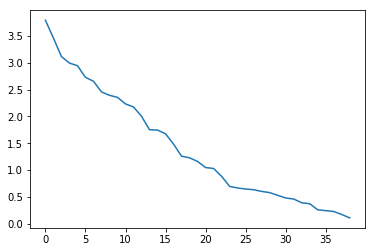

In [6]:
# Feature Selection
features, score = MDPD.utils.Feature_Selection.MI_feature_selection(train, 15)
plt.plot(score)
model.fit(train, ncomp=2, init='majority', verbose=False, features=features, niter=50)
model.accuracy(train, label)
model.MI_residue(train)

In [7]:
model.features

array([16,  7, 29, 34, 26, 24,  0, 31, 11,  8, 36, 37, 15, 19, 28])

In [8]:
model.change_features(train, features=range(model.dim))
model.accuracy(train, label)

2018-03-29 11:31:20,696 : INFO : ACCURACY: 90.74%


0.9074074074074074